 ## Manjiri Ramesh Pendharkar - 45933219

Github url - https://github.com/MQCOMP2200-S2-2020/portfolio-2020-manjiri2077

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
from datetime import timedelta
import seaborn as sns
%matplotlib inline

# Analysis of Cycling Data

## Loading Data

The first dataset is an export of my ride data from [Strava](https://strava.com/), an online social 
network site for cycling and other sports.  This data is a log of every ride since the start of 2018
and contains summary data like the distance and average speed.  It was exported using 
the script `stravaget.py` which uses the stravalib module to read data. Some details of
the fields exported by that script can be seen in [the documentation for stravalib](https://pythonhosted.org/stravalib/api.html#stravalib.model.Activity). 

The exported data is a CSV file so that's easy to read, however the date information in the file is 
recorded in a different timezone (UTC) so we need to do a bit of conversion.  In reading the data I'm
setting the index of the data frame to be the datetime of the ride. 

If the below cell gives error in `tz_localize`, use `tz_convert` as Pandas is time zone aware. 

In [2]:
# Obtaining strava data
strava = pd.read_csv('data/strava_export.csv', index_col='date', parse_dates=True)
strava.index = strava.index.tz_convert('UTC')
strava.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-02 20:47:51+00:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 01:36:53+00:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 02:56:00+00:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 05:37:04+00:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-05 19:22:46+00:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride


The second dataset comes from an application called [GoldenCheetah](https://www.goldencheetah.org/) which provides
some analytics services over ride data.  This has some of the same fields but adds a lot of analysis of the 
power, speed and heart rate data in each ride.  This data overlaps with the Strava data but doesn't include all 
of the same rides. 

Again we create an index using the datetime for each ride, this time combining two columns in the data (date and time) 
and localising to Sydney so that the times match those for the Strava data. 

In [3]:
## Obtaining cheetah data
cheetah = pd.read_csv('data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
cheetah.head()

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


The GoldenCheetah data contains many many variables (columns) and we won't go into all of them here. Some
that are of particular interest for the analysis below are:

Here are definitions of some of the more important fields in the data. Capitalised fields come from the GoldenCheetah data
while lowercase_fields come from Strava. There are many cases where fields are duplicated and in this case the values
should be the same, although there is room for variation as the algorithm used to calculate them could be different
in each case. 

  * Duration - overall duration of the ride, should be same as elapsed_time
  * Time Moving - time spent moving (not resting or waiting at lights), should be the same as moving_time
  * Elevation Gain - metres climbed over the ride
  * Average Speed - over the ride
  * Average Power - average power in watts as measured by a power meter, relates to how much effort is being put in to the ride, should be the same as  * average_watts' from Strava
  * Nonzero Average Power - same as Average Power but excludes times when power is zero from the average
  * Average Heart Rate - should be the same as average_heartrate
  * Average Cadence - cadence is the rotations per minute of the pedals
  * Average Temp - temperature in the environment as measured by the bike computer (should be same as average_temp)
  * VAM - average ascent speed - speed up hills
  * Calories (HR) - Calorie expendature as estimated from heart rate data
  * 1 sec Peak Power - this and other  'Peak Power' measures give the maximum power output in the ride over this time period.  Will be higher for shorter periods. High values in short periods would come from a very 'punchy' ride with sprints for example.
  * 1 min Peak Hr - a similar measure relating to Heart Rate
  * NP - Normalised Power, a smoothed average power measurement, generally higher than Average Power 
  * TSS - Training Stress Score, a measure of how hard a ride this was
  * device_watts - True if the power (watts) measures were from a power meter, False if they were estimated
  * distance - distance travelled in Km
  * kudos - likes from other Strava users (social network)
  * workout_type - one of  'Race',  'Workout' or  'Ride'
  
  
Some of the GoldenCheetah parameters are defined [in thier documentation](https://github.com/GoldenCheetah/GoldenCheetah/wiki/UG_Glossary).  

## Your Tasks

Your first task is to combine these two data frames using the [`join` method of Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#joining-on-index).   The goal is to keep only those rows of data 
that appear in __both__ data frames so that we have complete data for every row.  

In [4]:
# combining strava and cheetah data 
cycling_data = strava.join(cheetah, how='inner')
cycling_data

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.831550,20.2257
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.915540,94.5787
2018-01-31 21:13:34+00:00,109.8,19.0,143.0,False,26.3,649,612.00 m,6,113,Ride,...,0,0,0,0,0,0,0,0.000,0.000000,0.0000
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.946650,98.3269
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.868080,171.0780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-19 20:22:49+00:00,NaN,3.0,166.8,True,58.2,174,666.00 m,16,136,Ride,...,0,0,0,0,0,0,0,222.988,0.832045,159.3630
2019-07-26 20:12:56+00:00,120.8,7.0,166.9,True,59.6,185,663.00 m,15,139,Ride,...,0,0,0,0,0,0,0,236.028,0.880701,183.1140
2019-07-27 20:42:59+00:00,122.0,3.0,168.4,True,19.8,49,247.00 m,6,47,Ride,...,0,0,0,0,0,0,0,212.020,0.791118,51.1646
2019-07-27 21:47:24+00:00,144.4,3.0,235.2,True,29.1,50,415.00 m,15,50,Race,...,0,0,0,0,0,0,0,267.699,0.998877,83.5620


## Required Analysis

1. Remove rides with no measured power (where device_watts is False) - these are commutes or MTB rides
* Look at the distributions of some key variables: time, distance, average speed, average power, TSS. Are they normally distributed? Skewed? 
* Explore the relationships between the following variables. Are any of them corrolated with each other (do they vary together in a predictable way)? Can you explain any relationships you observe?  
    * Distance
    * Moving Time
    * Average Speed
    * Heart Rate
    * Power (watts)
    * Normalised power (NP)
    * Training Stress Score
    * Elevation Gain
* We want to explore the differences between the three categories: `Race`, `Workout` and `Ride`.
    * Use scatter plots with different colours for each category to explore how these categories differ.  
    * Use histograms or box plots to visualise the different distributions of a variable for the three categories.
    * In both cases, experiment with different variables but only include those that are interesting in your final notebook (if none are interesting, show us a representative example).
* We want to explore relationship between `rides` and `weather`. In order to carry out this analysis, you need `weather` data from relevant source. For your convenience, we have downloaded temperature data from [Bureau of Meterology](http://www.bom.gov.au/). You can find temperature under `Maximum temperature (Degree C)` column which represents maximum temperature for the day. Under the `data` directory, you get `weather_data_2018.csv` and `weather_data_2019.csv` files from where you can read daily temperatures. In order to get temperature for a day so that you can use in your combined dataframe (joining Strava and Cheetah datasets), you need to make `date` column consistent in both dataframes. 
    * Make `date` column consistent across both `weather` and `rides` datasets so that you can get `Maximum temperature` for the day of the ride. 
    * Can you find any relationship between distance travelled per ride and the temperature?
    * Can you find any relatioship between Average speed of ride and the temperature?


## Challenge

* What leads to more `kudos`? Is there anything to indicate which rides are more popular? Explore the relationship between the main variables and kudos. Show a plot and comment on any relationship you observe. 

* Generate a plot that summarises the number of km ridden each month over the period of the data. Overlay this with the _sum_ of the Training Stress Score and the _average_ of the Average Speed to generate an overall summary of activity.

* Generate a similar graph but one that shows the activity over a given month, with the sum of the values for each day of the month shown.  So, if there are two rides on a given day, the graph should show the sum of the distances etc for these rides.

Hint: to generate these summary plots you need to use the [timeseries/date functionality](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) in Pandas to generate a new data frame containing the required data.  

__Note:__ once you have completed these steps you can remove this cell.  Use the text as a starting point for the documentation of your workflow and discussion of results.


## Question 1

Removing rides with no measured power by selecting only those rides where device_watts is True

In [5]:
powered_rides = cycling_data[cycling_data['device_watts']== True]
powered_rides.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780
2018-02-09 19:18:03+00:00,123.0,20.0,145.9,True,59.8,193,656.00 m,22,139,Ride,...,0,0,0,0,0,0,0,212.726,0.79375,147.7970


## Question 2

Histogram distributions of some key variables: distance,TSS, average speed, average power,Time Moving.

Text(0, 0.5, 'Frequency')

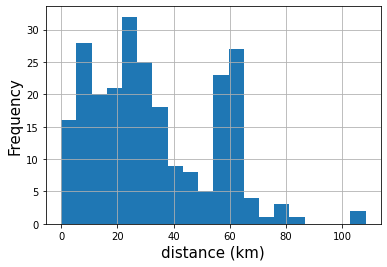

In [6]:
cycling_data['distance'].hist( histtype = 'stepfilled', bins = 20)
plt.xlabel("distance (km)", fontsize=15)
plt.ylabel("Frequency",fontsize=15)

Histogram suggests that distance has a right-skewed distribution. You see on the right side there are very few people who ride cycle for more than 100 kms. 

Text(0, 0.5, 'Frequency')

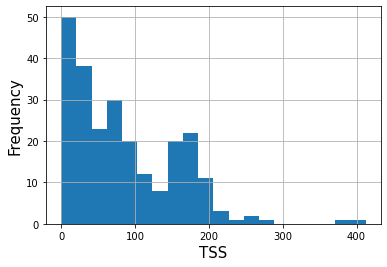

In [7]:
cycling_data['TSS'].hist( histtype = 'stepfilled', bins = 20)
plt.xlabel("TSS", fontsize=15)
plt.ylabel("Frequency",fontsize=15)

The above histogram indicates that the Training Stress Score, a measure of how hard a ride was is skewed right. There are a few cycle riders whose stress scores is higher than the rest. Most of the scores were between 0 and 80. 

Text(0, 0.5, 'Frequency')

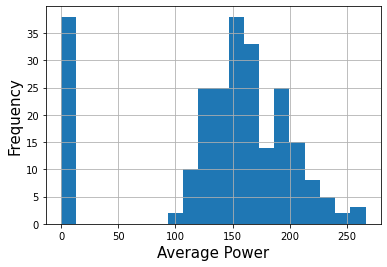

In [8]:
cycling_data['Average Power'].hist( histtype = 'stepfilled', bins = 20)
plt.xlabel("Average Power", fontsize=15)
plt.ylabel("Frequency",fontsize=15)

The figure indicates that the distribution of Average power is bimodal. Mainly the average power ie. the effort being put in to the ride is between 120 and 160 watts .

Text(0, 0.5, 'Frequency')

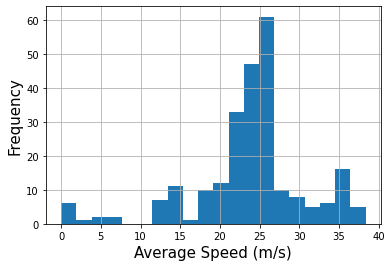

In [9]:
cycling_data['Average Speed'].hist( histtype = 'stepfilled', bins = 20)
plt.xlabel("Average Speed (m/s)", fontsize=15)
plt.ylabel("Frequency",fontsize=15)

The distribution of Average Speed of the ride is skewed left. Most of the rides have an average speed between 23 and 26 m/s.

Text(0, 0.5, 'Frequency')

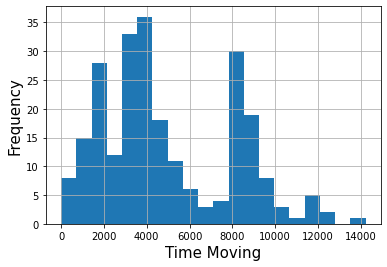

In [10]:
cycling_data['Time Moving'].hist( histtype = 'stepfilled', bins = 20)
plt.xlabel("Time Moving", fontsize=15)
plt.ylabel("Frequency",fontsize=15)

The histogram suggests that the distribution of Time moving is not normally distributed. It is bimodal and appears to be positively skewed in nature. 

### Question 3

Observing relationships between various variables by using correlation to infer wheather they vary together in a predictable way or not

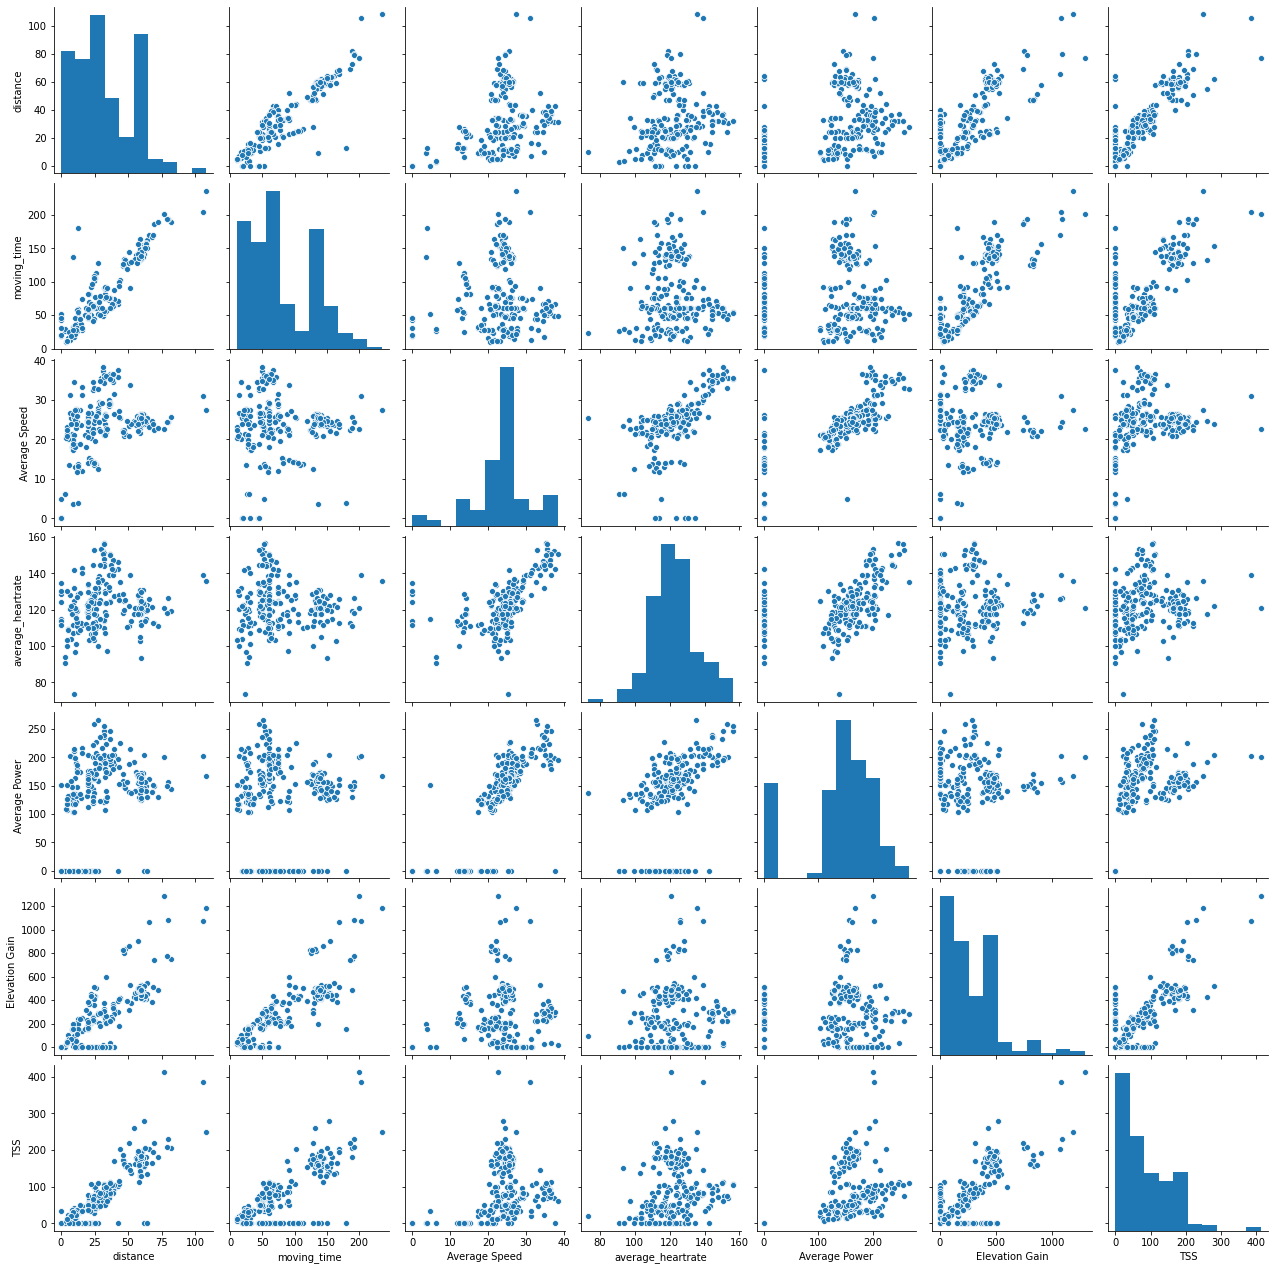

In [11]:
sns.pairplot(cycling_data[['distance','moving_time','Average Speed','average_heartrate','Average Power','Elevation Gain','TSS']])

In [12]:
cycling_data[['distance','moving_time','Average Speed','average_heartrate','Average Power','Elevation Gain','TSS']].corr()

,distance,moving_time,Average Speed,average_heartrate,Average Power,Elevation Gain,TSS
distance,1.000000,0.919235,0.354813,0.139204,0.283746,0.778818,0.880188
moving_time,0.919235,1.000000,0.024566,-0.043981,0.011593,0.814215,0.781805
Average Speed,0.354813,0.024566,1.000000,0.550812,0.775712,0.062132,0.340263
average_heartrate,0.139204,-0.043981,0.550812,1.000000,0.468864,0.058415,0.162631
Average Power,0.283746,0.011593,0.775712,0.468864,1.000000,0.000880,0.500283
Elevation Gain,0.778818,0.814215,0.062132,0.058415,0.000880,1.000000,0.722277
TSS,0.880188,0.781805,0.340263,0.162631,0.500283,0.722277,1.000000


Moving time and distance has the highest positive correlation of 0.91 that means as the value of one variable increases, the value of the other variable also increases. The second largest positive correlation is between TSS and distance. Elevation gain is highly correlated to moving time and distance.

### Question 4

Plots to visualise differences between the three categories of workout type- ride, race, workout


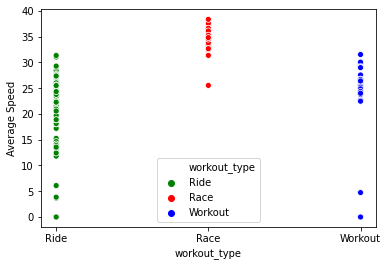

In [13]:
sns.scatterplot(x="workout_type", y="Average Speed",data=cycling_data,hue="workout_type", palette=['green','red','blue'])

The riders who are racing have average speed between 30 to 40 m/s which is higher as compared to average speed of rides and workout.

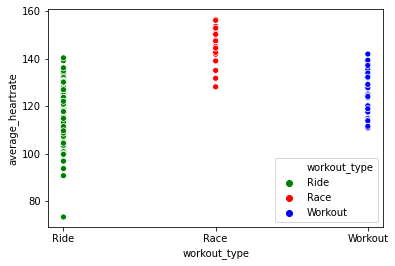

In [14]:
sns.scatterplot(x="workout_type", y='average_heartrate',data=cycling_data,hue="workout_type", palette=['green','red','blue'])

The above figure suggests that people participating in race have average heartrate between 125 and 160 beats per minute which is hightest amongst the three workout type categories.

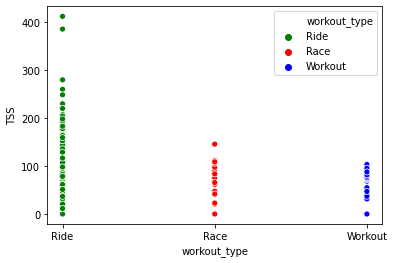

In [15]:
sns.scatterplot(x="workout_type", y='TSS',data=cycling_data,hue="workout_type", palette=['green','red','blue'])

The scatterplot for TSS indicates that, stress scores for race and workout is mainly between 0 and 100 whereas TSS score for rides have a larger spread of scores.

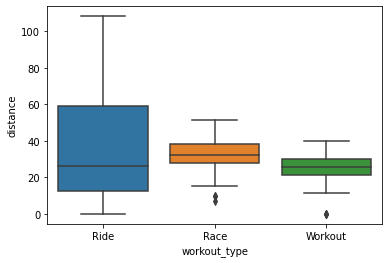

In [16]:
sns.boxplot(x='workout_type',y='distance', data=cycling_data, orient="v")

The medians of rides and workout are similar which is about 25 km whereas race has a slightly higher median value of 35 km. There are few outliers for race and workout. The spread of ride is more suggesting that riders travelled distance varies but 50% of rides travel distance between 15 to 60 km. 

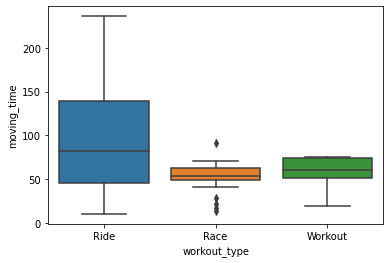

In [17]:
sns.boxplot(x='workout_type',y='moving_time', data=cycling_data, orient="v")

The medians of race and workout are  quite similar which has median moving time of around 60 minutes whereas a cycle ride has a slightly higher median value of 80 minutes. There are few outliers for race. The spread of race and workout is also similar where 50% of people ride cycle for 50 to 75 minutes. 

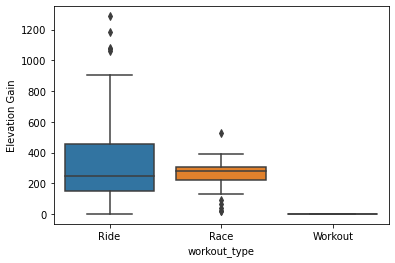

In [18]:
sns.boxplot(x='workout_type',y='Elevation Gain', data=cycling_data, orient="v")

From the box plot it is evident that almost no riders like to workout at high elevation level. The median elevation gain is around 250 and 300 metres for cycle rides and race respectively. There are only few people who like riding cycle at more than 1000 metres elevation. 

### Question 5

To explore relationship between rides and weather
First join the rides and weather datasets and make date column consistent across both the datasets so that you can get Maximum temperature for the day of the ride.

In [19]:
# reading weather 2018 data
weather2018 = pd.read_csv('data/weather_data_2018.csv')
print(weather2018.shape)
print(weather2018.head())

(365, 8)
  Product code  Bureau of Meteorology station number  Year  Month  Day  \
0   IDCJAC0010                                 66212  2018      1    1   
1   IDCJAC0010                                 66212  2018      1    2   
2   IDCJAC0010                                 66212  2018      1    3   
3   IDCJAC0010                                 66212  2018      1    4   
4   IDCJAC0010                                 66212  2018      1    5   

   Maximum temperature (Degree C)  \
0                            30.9   
1                            28.8   
2                            25.3   
3                            25.4   
4                            28.9   

   Days of accumulation of maximum temperature Quality  
0                                          1.0       Y  
1                                          1.0       Y  
2                                          1.0       Y  
3                                          1.0       Y  
4                                     

In [20]:
# reformatting date column and setting date as index for weather 2018 data 
weather2018['date']=[datetime.date(year=x[1].Year,month=x[1].Month,day=x[1].Day)for x in weather2018.iterrows()]
weather2018.set_index('date')

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
date,,,,,,,,
2018-01-01,IDCJAC0010,66212,2018,1,1,30.9,1.0,Y
2018-01-02,IDCJAC0010,66212,2018,1,2,28.8,1.0,Y
2018-01-03,IDCJAC0010,66212,2018,1,3,25.3,1.0,Y
2018-01-04,IDCJAC0010,66212,2018,1,4,25.4,1.0,Y
2018-01-05,IDCJAC0010,66212,2018,1,5,28.9,1.0,Y
...,...,...,...,...,...,...,...,...
2018-12-27,IDCJAC0010,66212,2018,12,27,33.8,1.0,Y
2018-12-28,IDCJAC0010,66212,2018,12,28,35.3,1.0,Y
2018-12-29,IDCJAC0010,66212,2018,12,29,35.9,1.0,Y


In [21]:
# reading weather 2019 data
weather2019 = pd.read_csv('data/weather_data_2019.csv')
print(weather2019.shape)
print(weather2019.head())

(365, 8)
  Product code  Bureau of Meteorology station number  Year  Month  Day  \
0   IDCJAC0010                                 66212  2019      1    1   
1   IDCJAC0010                                 66212  2019      1    2   
2   IDCJAC0010                                 66212  2019      1    3   
3   IDCJAC0010                                 66212  2019      1    4   
4   IDCJAC0010                                 66212  2019      1    5   

   Maximum temperature (Degree C)  \
0                            34.0   
1                            30.6   
2                            28.9   
3                            33.7   
4                            39.3   

   Days of accumulation of maximum temperature Quality  
0                                          1.0       Y  
1                                          1.0       Y  
2                                          1.0       Y  
3                                          1.0       Y  
4                                     

In [22]:
# reformatting date column and setting date as index for weather 2019 data
weather2019['date']=[datetime.date(year=x[1].Year,month=x[1].Month,day=x[1].Day)for x in weather2019.iterrows()]
weather2019.set_index('date')

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
date,,,,,,,,
2019-01-01,IDCJAC0010,66212,2019,1,1,34.0,1.0,Y
2019-01-02,IDCJAC0010,66212,2019,1,2,30.6,1.0,Y
2019-01-03,IDCJAC0010,66212,2019,1,3,28.9,1.0,Y
2019-01-04,IDCJAC0010,66212,2019,1,4,33.7,1.0,Y
2019-01-05,IDCJAC0010,66212,2019,1,5,39.3,1.0,Y
...,...,...,...,...,...,...,...,...
2019-12-27,IDCJAC0010,66212,2019,12,27,30.1,1.0,Y
2019-12-28,IDCJAC0010,66212,2019,12,28,33.8,1.0,Y
2019-12-29,IDCJAC0010,66212,2019,12,29,30.7,1.0,Y


In [23]:
# combining 2018 and 2019 weather datasets into weather_data
weather_data =weather2018.append(weather2019,ignore_index=True)
weather_data

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality,date
0,IDCJAC0010,66212,2018,1,1,30.9,1.0,Y,2018-01-01
1,IDCJAC0010,66212,2018,1,2,28.8,1.0,Y,2018-01-02
2,IDCJAC0010,66212,2018,1,3,25.3,1.0,Y,2018-01-03
3,IDCJAC0010,66212,2018,1,4,25.4,1.0,Y,2018-01-04
4,IDCJAC0010,66212,2018,1,5,28.9,1.0,Y,2018-01-05
...,...,...,...,...,...,...,...,...,...
725,IDCJAC0010,66212,2019,12,27,30.1,1.0,Y,2019-12-27
726,IDCJAC0010,66212,2019,12,28,33.8,1.0,Y,2019-12-28
727,IDCJAC0010,66212,2019,12,29,30.7,1.0,Y,2019-12-29
728,IDCJAC0010,66212,2019,12,30,33.2,1.0,Y,2019-12-30


In [24]:
# setting date as index for weather_data
weather_data.set_index('date')
weather_data.date=weather_data['date']

In [25]:
# reformatting date of cycling_data
cycling_data['date']=pd.to_datetime(cycling_data['date']).dt.date
cycling_data['date']

2018-01-27 19:39:49+00:00    2018-01-28
2018-01-27 20:01:32+00:00    2018-01-28
2018-01-31 21:13:34+00:00    2018-02-01
2018-02-05 21:06:42+00:00    2018-02-06
2018-02-07 06:59:05+00:00    2018-02-07
                                ...    
2019-07-19 20:22:49+00:00    2019-07-20
2019-07-26 20:12:56+00:00    2019-07-27
2019-07-27 20:42:59+00:00    2019-07-28
2019-07-27 21:47:24+00:00    2019-07-28
2019-07-27 23:55:13+00:00    2019-07-28
Name: date, Length: 243, dtype: object

In [26]:
# combining weather and cycling data based on date
weather_cycling_data =pd.merge(weather_data,cycling_data, on='date', how='inner')
weather_cycling_data

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality,date,average_heartrate,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
0,IDCJAC0010,66212,2018,1,28,30.7,1.0,Y,2018-01-28,120.6,...,0,0,0,0,0,0,0,222.856,0.831550,20.2257
1,IDCJAC0010,66212,2018,1,28,30.7,1.0,Y,2018-01-28,146.9,...,0,0,0,0,0,0,0,245.365,0.915540,94.5787
2,IDCJAC0010,66212,2018,2,1,24.3,1.0,Y,2018-02-01,109.8,...,0,0,0,0,0,0,0,0.000,0.000000,0.0000
3,IDCJAC0010,66212,2018,2,6,28.2,1.0,Y,2018-02-06,119.3,...,0,0,0,0,0,0,0,253.702,0.946650,98.3269
4,IDCJAC0010,66212,2018,2,7,28.1,1.0,Y,2018-02-07,124.8,...,0,0,0,0,0,0,0,232.644,0.868080,171.0780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,IDCJAC0010,66212,2019,7,20,20.6,1.0,Y,2019-07-20,NaN,...,0,0,0,0,0,0,0,222.988,0.832045,159.3630
239,IDCJAC0010,66212,2019,7,27,20.3,1.0,Y,2019-07-27,120.8,...,0,0,0,0,0,0,0,236.028,0.880701,183.1140
240,IDCJAC0010,66212,2019,7,28,19.3,1.0,Y,2019-07-28,122.0,...,0,0,0,0,0,0,0,212.020,0.791118,51.1646
241,IDCJAC0010,66212,2019,7,28,19.3,1.0,Y,2019-07-28,144.4,...,0,0,0,0,0,0,0,267.699,0.998877,83.5620


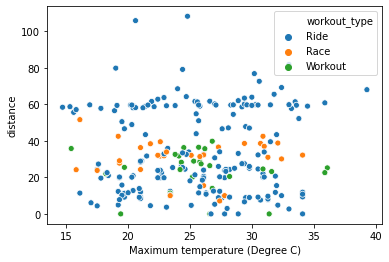

In [27]:
sns.scatterplot(x='Maximum temperature (Degree C)',y ='distance', data=weather_cycling_data,hue='workout_type')

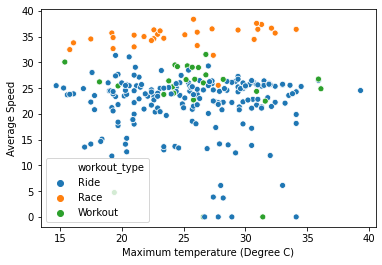

In [28]:
sns.scatterplot(x='Maximum temperature (Degree C)',y='Average Speed', data=weather_cycling_data,hue='workout_type')

The above figures suggests that most of the people prefer riding cycle when temperature is below 35 degree Celsius.

In [29]:
weather_cycling_data[['Maximum temperature (Degree C)','Average Speed','distance']].corr()

,Maximum temperature (Degree C),Average Speed,distance
Maximum temperature (Degree C),1.000000,-0.062686,0.015475
Average Speed,-0.062686,1.000000,0.354813
distance,0.015475,0.354813,1.000000


There is very low negative correlation between Maximum temperature and average speed and almost no relation between Maximum temperature and distance.

## Conclusion

From the analysis, we can infer that some of the variables of interest do vary together in a predictable way such as -
There is positive correlation between Moving time and distance, TSS and distance, followed by Elevation gain which is highly correlated to moving time and distance. 
Moreover the scatterplot indicates that, people participating in race have higher average heartrate, average speed as compared to ride and workout type. But relationship between TSS (training stress score) and three different categories of workout type is not obvious. Also from looking at the wide spread of the boxplots, we can say that people mostly prefer to go for a bicycle ride rather than undertaking cycle race or doing workout.
However, there is no obvious relationship between temperature and distance and very little negative correlation (-0.06) between Maximum temperature and average speed suggesting that as the value of one variable increases, the value of other variable decreases. But it is evident that most people prefer riding cycle when temperature is below 35 degree Celsius.